# Neccesary Libraries

In [19]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
salary_data = pd.read_csv('Salary_Data.csv')
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# Data Understanding

In [6]:
salary_data.shape

(30, 2)

In [7]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [9]:
salary_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [10]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [12]:
salary_data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

# Assumption Check

## Linearity test

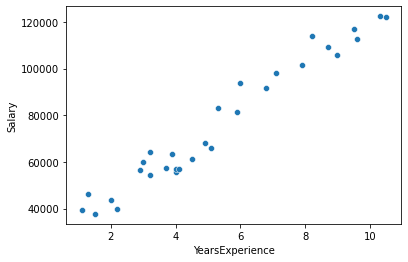

In [35]:
sns.scatterplot(x ='YearsExperience',y = 'Salary',data = salary_data);

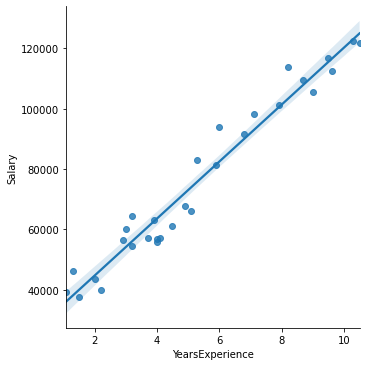

In [32]:
sns.lmplot(x ='YearsExperience',y = 'Salary',data = salary_data);

#### Linearity test failed

## Normality Test

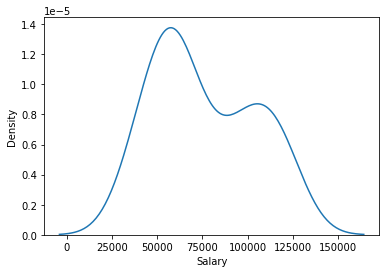

In [33]:
sns.distplot(a=salary_data['Salary'],hist=False);

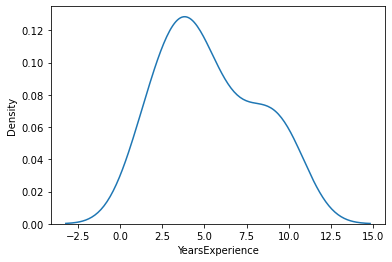

In [34]:
sns.distplot(a=salary_data['YearsExperience'],hist=False);

In [37]:
salary_data.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [38]:
salary_data.kurtosis()

YearsExperience   -1.012212
Salary            -1.295421
dtype: float64

#### Normality test failed

# Multi collinearity

***we cannot perform we have only one input***

# Auto Regression

**we cannot perform here as we are having only one input feature and that is also not time  based feature**

## Model Building || Model training using stats Model